In [621]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.morphology as morph
import networkx as nx
import matplotlib.pyplot as plt

In [622]:
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

In [623]:
prueba1 = cv2.imread('database/11_gt.pgm', cv2.IMREAD_UNCHANGED)

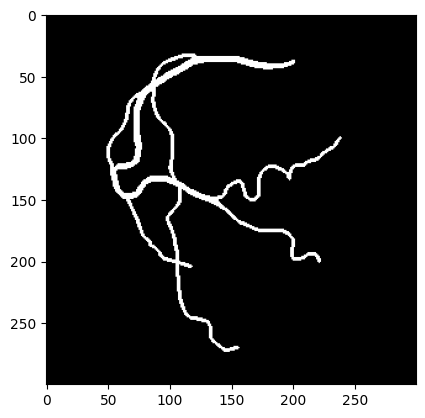

In [624]:
plot_image(prueba1)

In [625]:
def esqueletizar(imagen):
    return morph.skeletonize(imagen).astype(np.uint8)

In [626]:
def closing(imagen, kernel):
    return morph.closing(imagen, kernel)

In [627]:
def opening(imagen, kernel):
    return morph.opening(imagen, kernel)

In [628]:
def erosion(imagen, kernel):
    return morph.erosion(imagen, kernel)

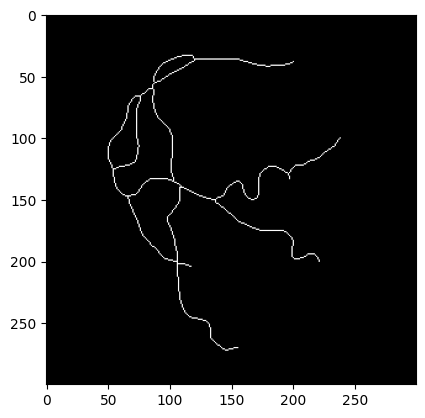

In [629]:
esqueleto = esqueletizar(prueba1)
plot_image(esqueleto)

In [630]:
# graph = {}

In [631]:
class Node(object):
    x = 0
    y = 0

    def set_position(self, x, y):
        self.x = x
        self.y = y
        self.pos = (x, y)

    def get_position(self):
        return (self.x, self.y)

In [632]:
# nodos = {}
# G = nx.Graph()
# first = True
# raiz = None

In [633]:
def add_nodo(x, y, G, nodos):
    if (x, y) not in nodos:
        nodos[(x, y)] = Node()
        nodos[(x, y)].set_position(x, y)
        G.add_node((x, y), pos=(x, y))
    # global first 
    # global raiz
    # if first:
    #     first = False
    #     raiz = (x, y)
        

In [634]:
def add_transition(x1, y1, x2, y2, G, nodos):
    add_nodo(x2, y2, G, nodos)
    G.add_edge((x1, y1), (x2, y2))

In [635]:
def check_neighbors(x, y, image, G, nodos):
    neighbors = []
    down = False
    up = False
    right = False
    left = False
    
    add_nodo(x, y, G, nodos)
    
    # left 
    if x > 0 and image[x-1, y] == 1:
        neighbors.append((x-1, y))
        left = True
        add_transition(x, y, x-1, y, G, nodos)
    # right
    if x < image.shape[0] - 1 and image[x+1, y] == 1:
        neighbors.append((x+1, y))
        right = True
        add_transition(x, y, x+1, y, G, nodos)
    # up
    if y > 0 and image[x, y-1] == 1:
        neighbors.append((x, y-1))
        up = True
        add_transition(x, y, x, y-1, G, nodos)
    # down
    if y < image.shape[1] - 1 and image[x, y+1] == 1:
        neighbors.append((x, y+1))
        down = True
        add_transition(x, y, x, y+1, G, nodos)
    # upper left
    if x > 0 and y > 0 and image[x-1, y-1] == 1 and not (up or left):
        neighbors.append((x-1, y-1))
        add_transition(x, y, x-1, y-1, G, nodos)
    # lower left
    if x > 0 and y < image.shape[1] - 1 and image[x-1, y+1] == 1 and not (down or left):
        neighbors.append((x-1, y+1))
        add_transition(x, y, x-1, y+1, G, nodos)
    # upper right
    if x < image.shape[0] - 1 and y > 0 and image[x+1, y-1] == 1 and not (up or right):
        neighbors.append((x+1, y-1))
        add_transition(x, y, x+1, y-1, G, nodos)
    # lower right
    if x < image.shape[0] - 1 and y < image.shape[1] - 1 and image[x+1, y+1] == 1 and not (down or right):
        neighbors.append((x+1, y+1))
        add_transition(x, y, x+1, y+1, G, nodos)
        
    return neighbors

In [636]:
def construct_graph(imagen, G, nodos):
    
    imagen = imagen.copy()
    bifurcation = []
    trifurcation = []
    end_points = []
    intemediate = []
    mod = 10
    cont = 0
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            if imagen[i][j] == 1:
                # node = Node()
                # node.set_position(i, j)
                # graph[(i, j)] = node
                neighbors = check_neighbors(i, j, imagen, G, nodos)
                if len(neighbors) == 3:
                    bifurcation.append((i, j))
                if len(neighbors) == 4:
                    trifurcation.append((i, j))
                if len(neighbors) == 1:
                    end_points.append((i, j))
                if len(neighbors) == 2:
                    if i%30==0 or j%30==0:
                        intemediate.append([i, j])
            cont += 1 
    # intemediate = np.array(intemediate)
    # indices_ordenados = np.lexsort(intemediate.T)
    # intemediate = intemediate[indices_ordenados]
    # intemediate = intemediate.tolist()
    
    # eliminar = []
    # for i in range(len(intemediate) - 1):
    #     if i %mod != 0:
    #         eliminar.append(i)
        
    # intemediate = [i for j, i in enumerate(intemediate) if j not in eliminar]
    return None, bifurcation, trifurcation, end_points, intemediate            

In [637]:
# _, bifurcation, trifurcation, end_points, intermediate = construct_graph(esqueleto, G, nodos)

# # Convertir arrays de NumPy a listas
# bifurcation = np.unique(bifurcation, axis=0).tolist()
# trifurcation = np.unique(trifurcation, axis=0).tolist()
# end_points = np.unique(end_points, axis=0).tolist()

In [638]:
# # temp = esqueleto[28:35, 160:170]
# # temp = esqueleto[28:35, 160:170]
# temp = esqueleto[41:50, 220:230]
# # print(temp)
# plot_image(temp)

In [639]:
def join_points(window_len,array):
    new_array = []
    elimimnar = []
    for element in array:
        matriz = [[0] * window_len for _ in range(window_len)]
        x, y = element
        for i in range(window_len):
            for j in range(window_len):
                matriz[i][j] = [x - window_len//2 + i,y - window_len//2 + j]
        for fila in matriz:
            for vecino in fila:
                if vecino in array and vecino != element:
                    avg = vecino # [(vecino[0] + x)//2, (vecino[1] + y)//2]
                    array.remove(vecino)
                    elimimnar.append(vecino)
                    if element not in elimimnar:
                        elimimnar.append(element)
                    new_array.append(avg)
                    
    for element in elimimnar:
        if element in array:
            array.remove(element)
            
    return array,new_array


In [640]:
# cuatrifurcation = []
# ventana = 10
# plt.imshow(esqueleto, cmap='gray')
# bifurcation, new_trifurcation = join_points(ventana,bifurcation)
# if len(new_trifurcation) > 0:
#     if len(trifurcation) > 1:
#         trifurcation.append(new_trifurcation)
#     else:
#         trifurcation.extend(new_trifurcation)


# trifurcation, new_cuatrifurcation = join_points(ventana,trifurcation)
# if len(new_cuatrifurcation) > 0:
#     if len(cuatrifurcation) > 1:
#         cuatrifurcation.append(new_cuatrifurcation)
#     else:
#         cuatrifurcation.extend(new_cuatrifurcation)

# all_points = []
# all_points.extend(bifurcation)
# all_points.extend(trifurcation)
# all_points.extend(end_points)
# all_points.extend(intermediate)

# x = [coord[1] for coord in bifurcation]
# y = [coord[0] for coord in bifurcation]
# plt.plot(x, y, 'ro')

# x2 = [coord[1] for coord in trifurcation]
# y2 = [coord[0] for coord in trifurcation]
# plt.plot(x2, y2, 'bo')

# x3 = [coord[1] for coord in end_points]
# y3 = [coord[0] for coord in end_points]
# plt.plot(x3, y3, 'go')

# x4 = [coord[1] for coord in intermediate]
# y4 = [coord[0] for coord in intermediate]
# plt.plot(x4, y4, 'yo')



# plt.show()

In [641]:
# pos = nx.get_node_attributes(G, 'pos')
# #pos = {nodo: nodo.get_position() for nodo in G.nodes()}
# nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='skyblue', font_color='black', node_size=5)
# plt.show()

In [642]:
# last_node = None
def dfs_custom(G, node, visited, all_points, last_nodes, edges, orientation='left'):
    if max == 0:
        return
    # global last_node, raiz
    
    # node_t = [node[0], node[1]]
    # Marcar el nodo como visitado
    node_t = [node[0], node[1]]
    # if node_t in all_points:
    #     if last_node is not None:
    #         edges.append((last_node, node))
    #     last_node = node
    node = tuple(node)
    if node not in visited:
        if node_t in all_points:
            if len(last_nodes) > 0:
                edges.append((last_nodes[-1], node))
            last_nodes.append(node)

        visited.add(node)
        
        if orientation == 'left':
            neighbours = list(G.neighbors(node))
        else:
            neighbours = sorted(list(G.neighbors(node)), reverse=True)
            # neighbours.sort(reverse=True)
        # print(len(neighbours))

        # Recorrer todos los nodos adyacentes al nodo actual
        for neighbour in neighbours:
            if neighbour not in visited:
                dfs_custom(G, neighbour, visited, all_points, last_nodes, edges, orientation=orientation)
    
        if node_t in all_points:
            if len(last_nodes) > 0:
                last_nodes.pop()
        # last_nodes.pop()

In [643]:
def get_edges(G, all_points):
    visited = set()
    last_nodes = []
    lowest_point = min(all_points, key=lambda x: x[0])
    raiz = tuple(lowest_point)
    edgesx = []
    edges1 = []
    dfs_custom(G, raiz, visited, all_points, last_nodes, edgesx)
    visited = set()
    dfs_custom(G, raiz, visited, all_points, last_nodes, edges1, orientation='right')
    edgesx.extend(edges1)
    print(len(edgesx))
    return edgesx, raiz

In [644]:
# visited = set()
# last_nodes = []
# highest_point = max(all_points, key=lambda x: x[0])
# raiz = tuple(highest_point)
# lowest_point = min(all_points, key=lambda x: x[0])
# raiz = tuple(lowest_point)
# print(raiz)
# edgesx = []
# edges1 = []
# dfs_custom(G, raiz, visited, last_nodes, edgesx)
# visited = set()
# dfs_custom(G, raiz, visited, last_nodes, edges1, orientation='right')
# edgesx.extend(edges1)
# print(edgesx)

# # edgesx = get_edges(G, all_points)

In [645]:
# edgesx, raiz = get_edges(G, all_points)

In [646]:
# plt.figure(figsize=(3, 3), dpi=100)
# plt.scatter(raiz[1], raiz[0], color='green', s=15)
# for point in all_points:
#     plt.scatter(point[1], point[0], color='red', s=5)

# for arista in edgesx:
#     plt.plot([arista[0][1], arista[1][1]], [arista[0][0], arista[1][0]], color='blue')
    
# plt.gca().invert_yaxis()

# plt.gca().set_aspect('equal', adjustable='box')
# plt.show()

In [647]:
# result = bifurcation + trifurcation + end_points + intermediate

In [648]:
# x = [coord[1] for coord in result]
# y = [coord[0] for coord in result]
# plt.plot(x, y, 'ro')
# plt.imshow(esqueleto, cmap='gray')
# plt.show()

In [649]:
def generate_image(bifurcations, trifurcations, end_points, intermediate, edges, path):
    path = path.split('/')[1].replace('.pgm', '.png')
    path = 'grafo_estructura/' + path
    plt.figure(figsize=(3, 3), dpi=100)
    plt.gca().set_facecolor('black')
    
    for arista in edges:
        plt.plot([arista[0][1], arista[1][1]], [arista[0][0], arista[1][0]], color='red', linewidth=0.5)
        
    for point in intermediate:
        plt.scatter(point[1], point[0], color='skyblue', s=7)

    for point in bifurcations:
        plt.scatter(point[1], point[0], color='black', s=7)
    
    for point in trifurcations:
        plt.scatter(point[1], point[0], color='blue', s=7)

    for point in end_points:
        plt.scatter(point[1], point[0], color='green', s=7)

    

    
        
    plt.gca().invert_yaxis()

    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    
    # 

    plt.savefig(path, bbox_inches='tight', pad_inches=0)
    plt.close()

In [650]:
def Generate_data(ruta):
    print(ruta)
    imagen_groundtruth = cv2.imread(ruta, cv2.IMREAD_UNCHANGED)
    esqueleto = esqueletizar(imagen_groundtruth)
    
    plt.figure(figsize=(10, 5))

    # Subgráfico 1 (1 fila, 2 columnas, primer subgráfico)
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_groundtruth, cmap='gray')
    plt.title('Groundtruth image')
    G = nx.Graph()
    nodos = {}
    _, bifurcation, trifurcation, end_points, intermediate = construct_graph(esqueleto, G, nodos)

    # pos = nx.get_node_attributes(G, 'pos')
    # #pos = {nodo: nodo.get_position() for nodo in G.nodes()}
    # nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='skyblue', font_color='black', node_size=5)
    # plt.show()
    # Convertir arrays de NumPy a listas
    bifurcation = np.unique(bifurcation, axis=0).tolist()
    trifurcation = np.unique(trifurcation, axis=0).tolist()
    end_points = np.unique(end_points, axis=0).tolist()
    
    cuatrifurcation = []
    ventana = 10
    bifurcation, new_trifurcation = join_points(ventana, bifurcation)
    if len(new_trifurcation) > 0:
        if len(trifurcation) > 1:
            trifurcation.append(new_trifurcation)
        else:
            trifurcation.extend(new_trifurcation)


    trifurcation, new_cuatrifurcation = join_points(ventana, trifurcation)
    if len(new_cuatrifurcation) > 0:
        if len(cuatrifurcation) > 1:
            cuatrifurcation.append(new_cuatrifurcation)
        else:
            cuatrifurcation.extend(new_cuatrifurcation)

    all_points = []
    all_points.extend(bifurcation)
    all_points.extend(trifurcation)
    all_points.extend(end_points)
    all_points.extend(intermediate)
    edges = get_edges(G, all_points)
    edges = edges[0]
    
    

    plt.subplot(1, 2, 2)
    plt.imshow(esqueleto, cmap='gray')
    plt.title('Graph image')
    
    x4 = [coord[1] for coord in intermediate]
    y4 = [coord[0] for coord in intermediate]
    plt.plot(x4, y4, 'yo')

    x = [coord[1] for coord in bifurcation]
    y = [coord[0] for coord in bifurcation]
    plt.plot(x, y, 'ro')

    x2 = [coord[1] for coord in trifurcation]
    y2 = [coord[0] for coord in trifurcation]
    plt.plot(x2, y2, 'bo')

    x3 = [coord[1] for coord in end_points]
    y3 = [coord[0] for coord in end_points]
    plt.plot(x3, y3, 'go')

    plt.tight_layout()

    # Guardar la figura en un archivo (por ejemplo, PNG)
    plt.savefig('Imagenes_resultados/'+ruta[9:]+'.png')
    plt.show()
    generate_image(bifurcation, trifurcation, end_points, intermediate, edges, ruta)
    nodos = bifurcation + trifurcation + end_points + intermediate
    
    edges = [[list(edge[0]), list(edge[1])] for edge in edges]
    Json_text = '{"nodos":'+str(nodos) + \
        ',\n"extremos":' + \
        str(end_points) + \
        ',\n"bifurcaciones":' + \
        str(bifurcation) + \
        ',\n"trifurcaciones":' + \
        str(trifurcation)+ \
        ',\n"intermedios":' + \
        str(intermediate) + \
        ',\n"cuatrifurcaciones":' + \
        str(cuatrifurcation) + \
        ',\n"edges":' + \
        str(edges)+'\n}'
    #Escribir el archivo JSON
    with open('Grafo_resultado/'+ruta[9:]+'.json', 'w') as file:
        file.write(Json_text)


    

database/11_gt.pgm
128


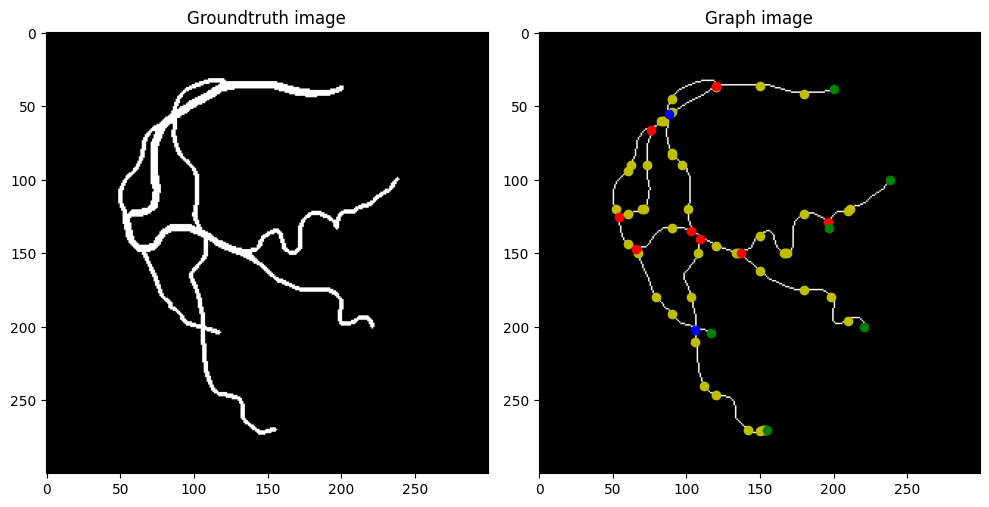

database/10_gt.pgm
134


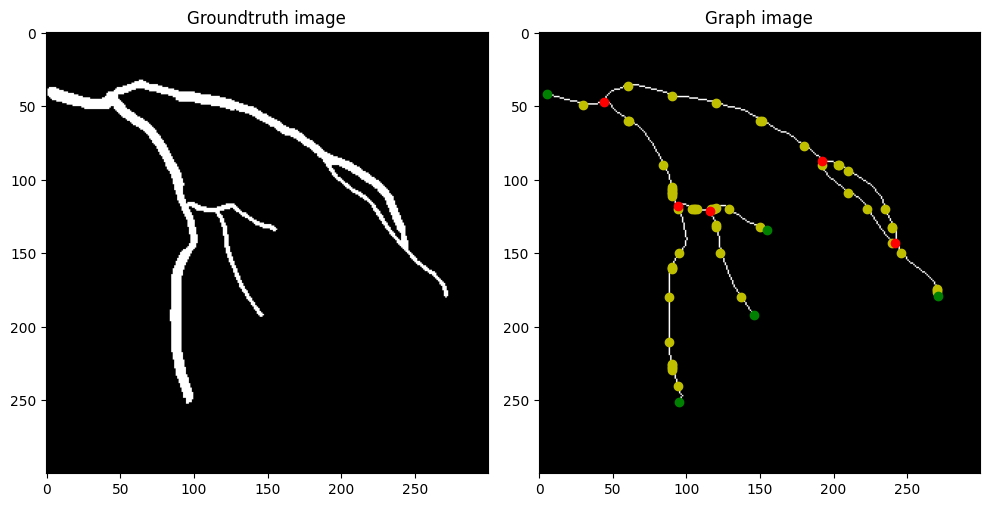

database/11_gt.pgm
128


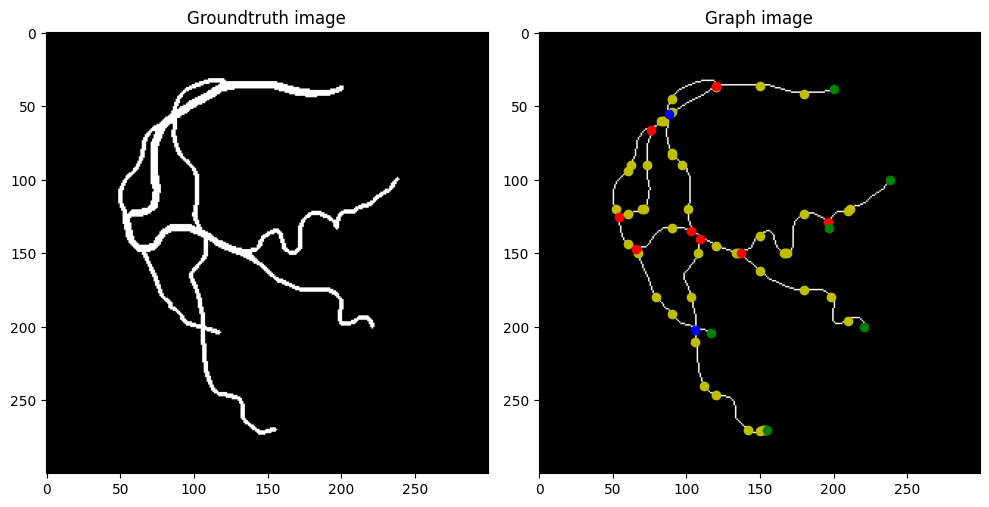

database/12_gt.pgm
194


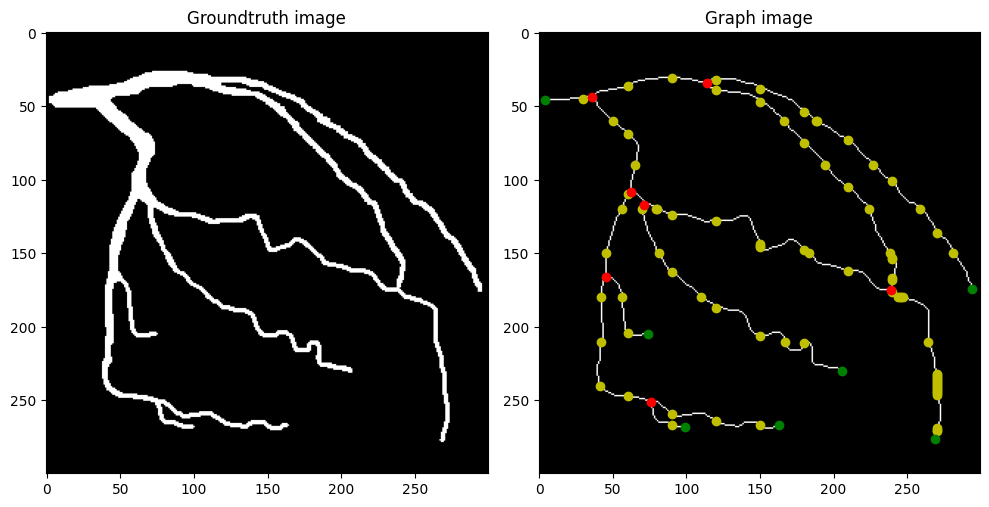

database/13_gt.pgm
94


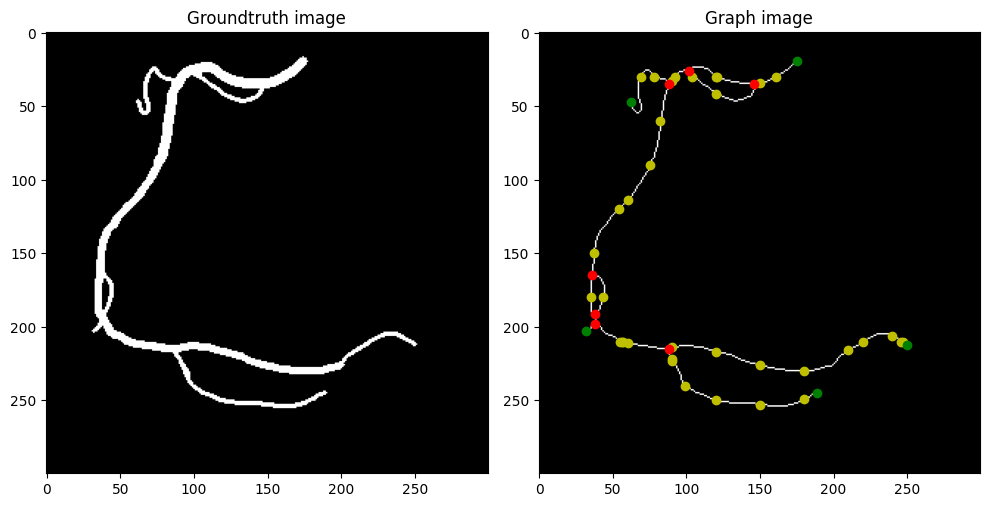

database/14_gt.pgm
236


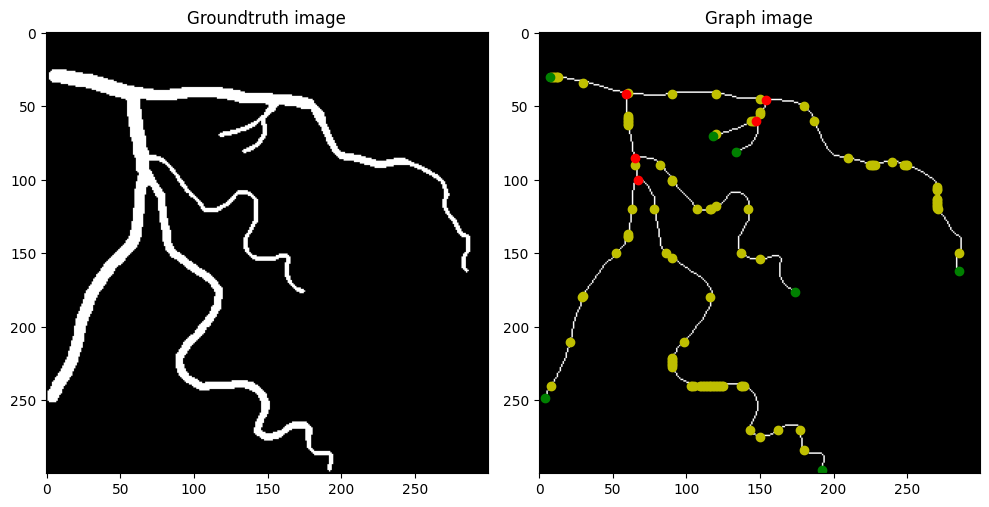

database/15_gt.pgm
128


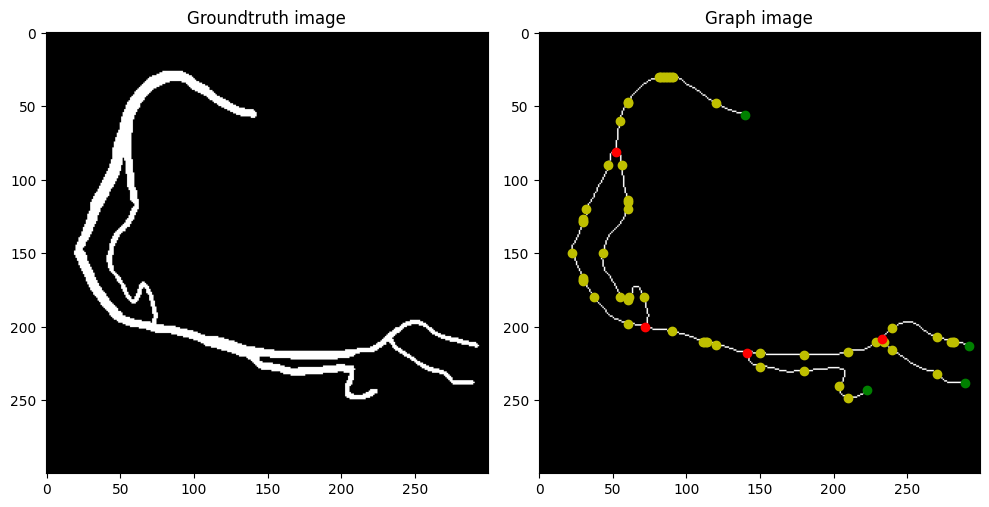

database/16_gt.pgm
132


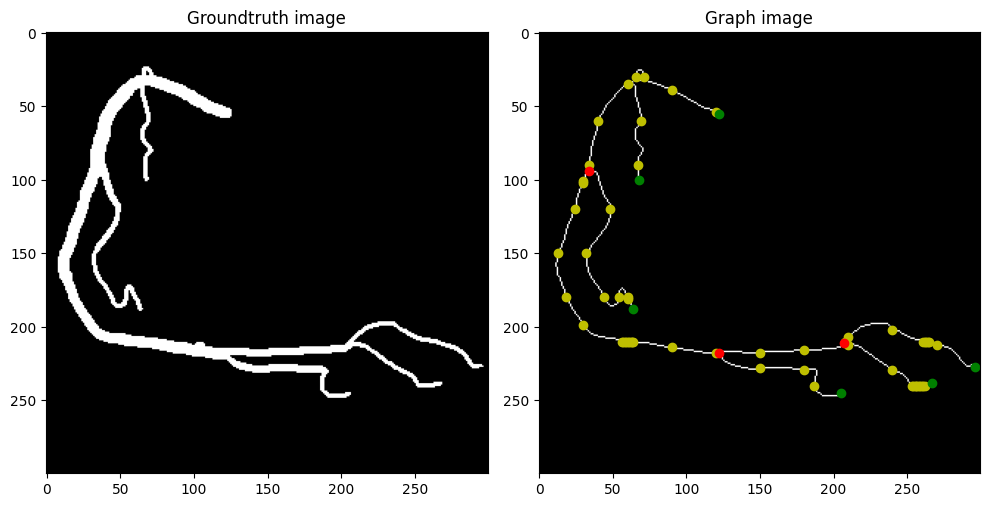

database/17_gt.pgm
114


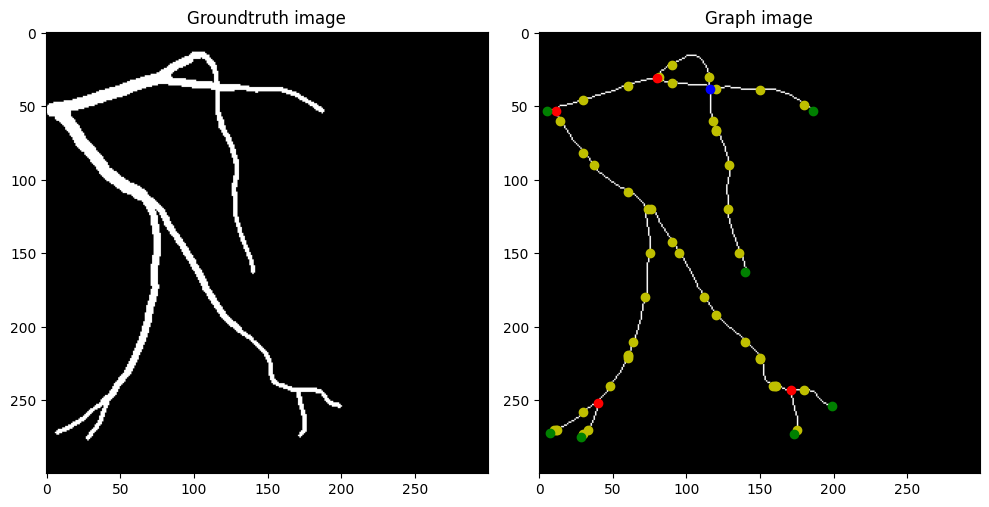

database/18_gt.pgm
112


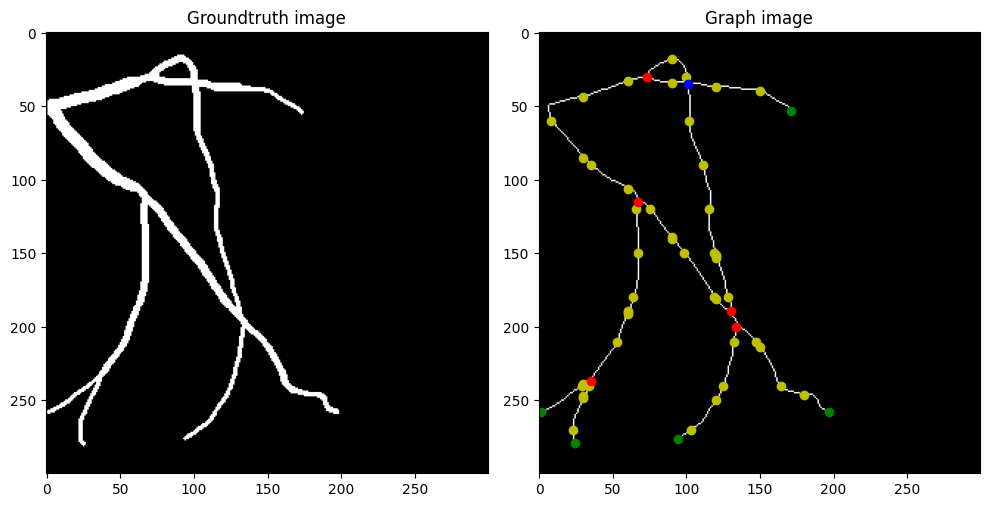

database/19_gt.pgm
106


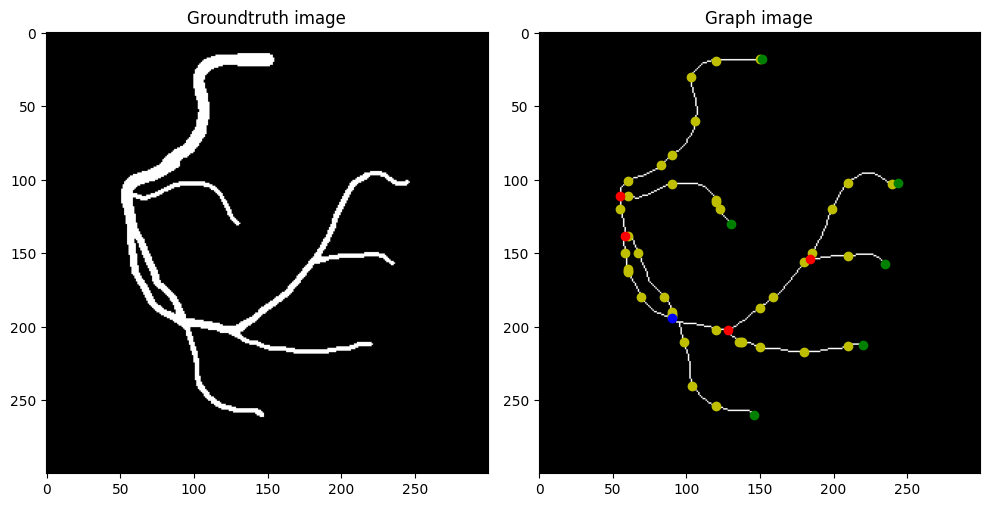

database/1_gt.pgm
112


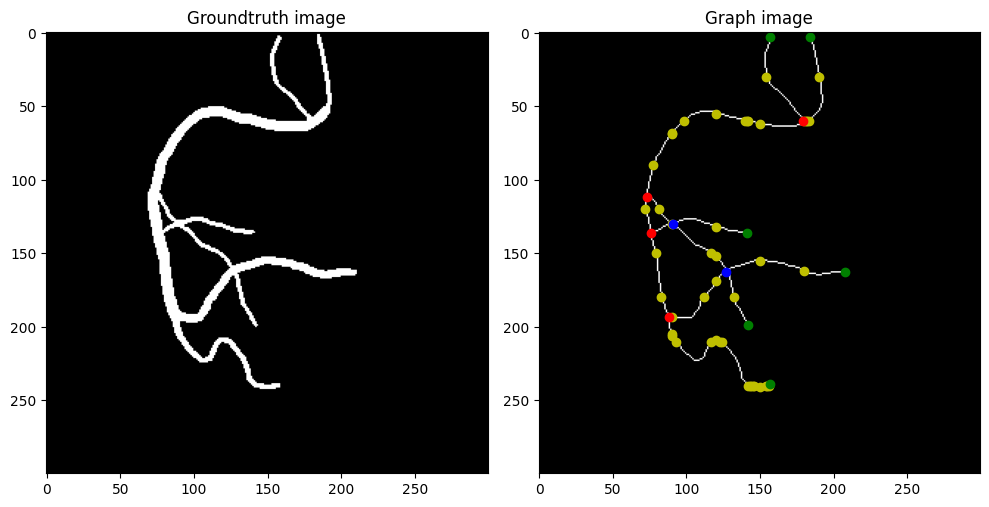

database/20_gt.pgm
134


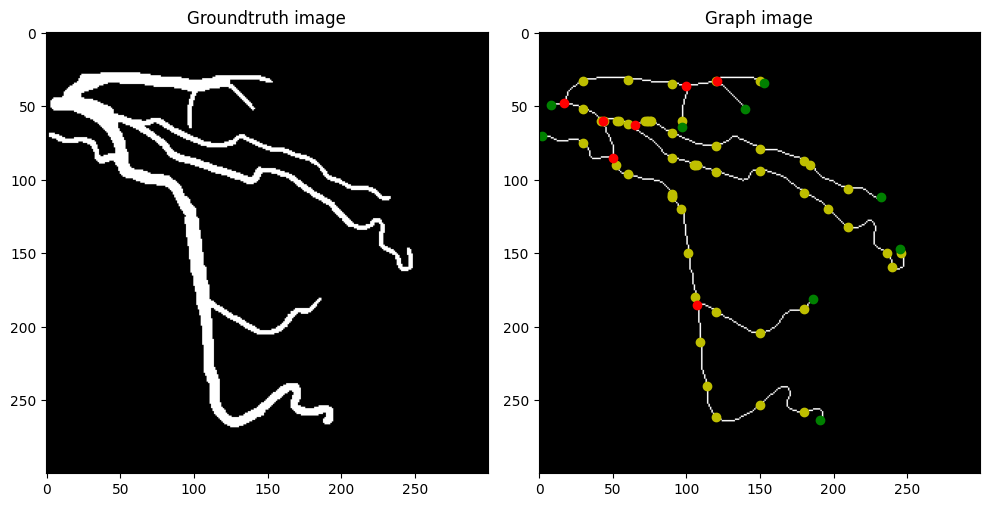

database/2_gt.pgm
140


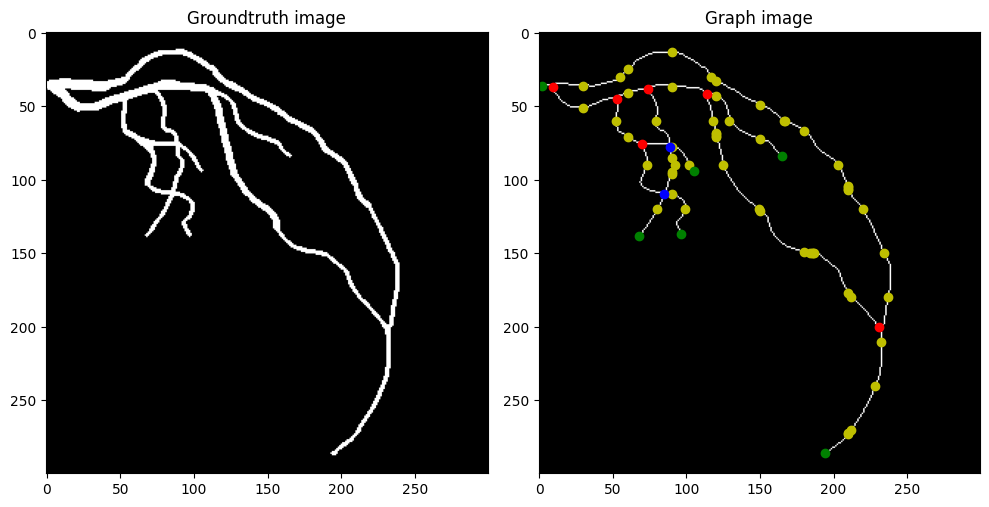

database/3_gt.pgm
168


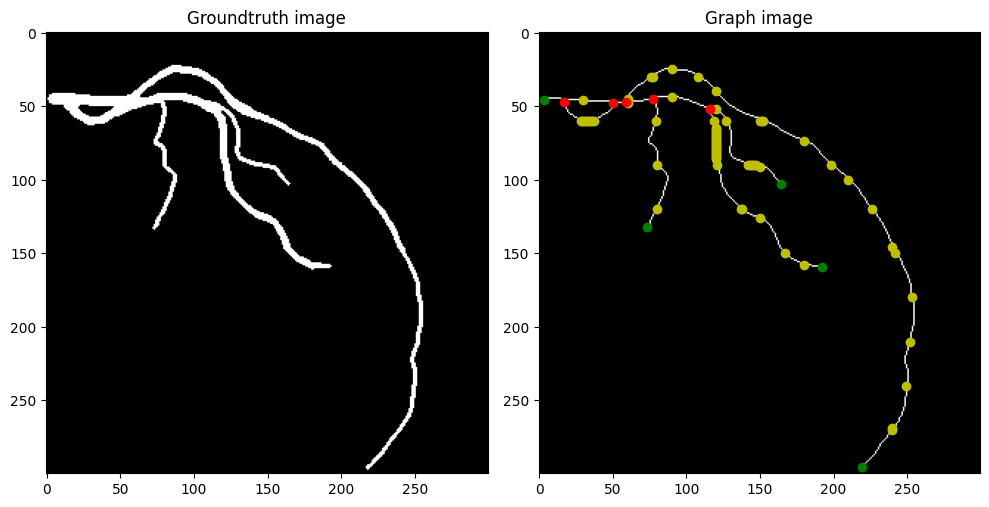

database/4_gt.pgm
74


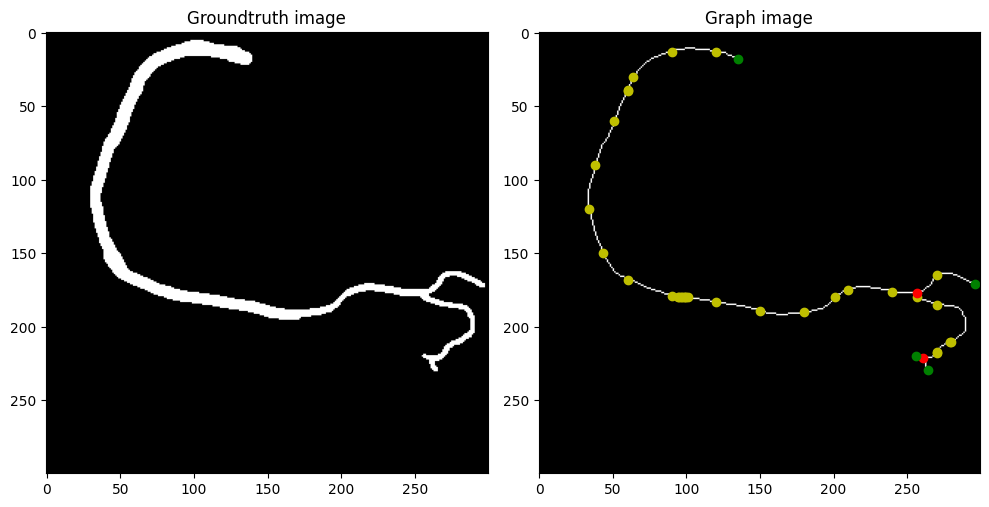

database/5_gt.pgm
122


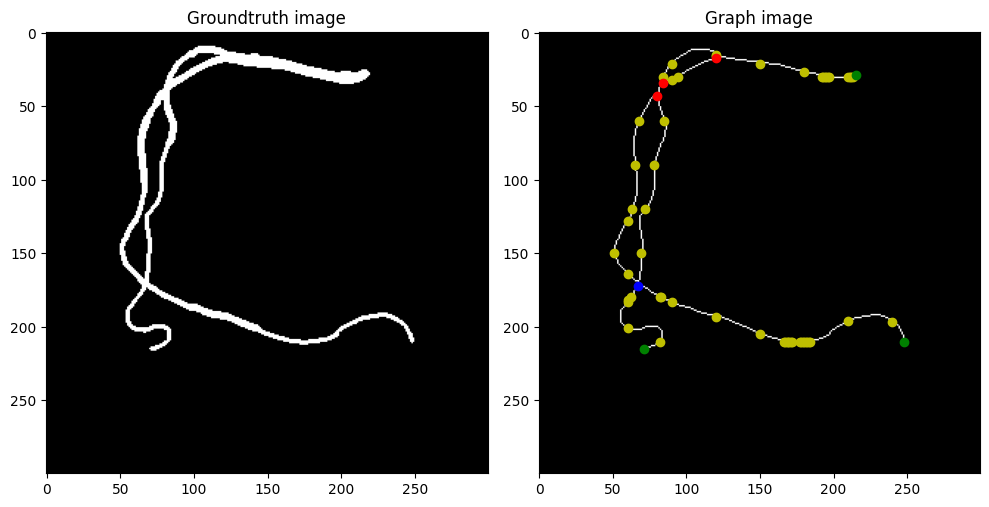

database/6_gt.pgm
88


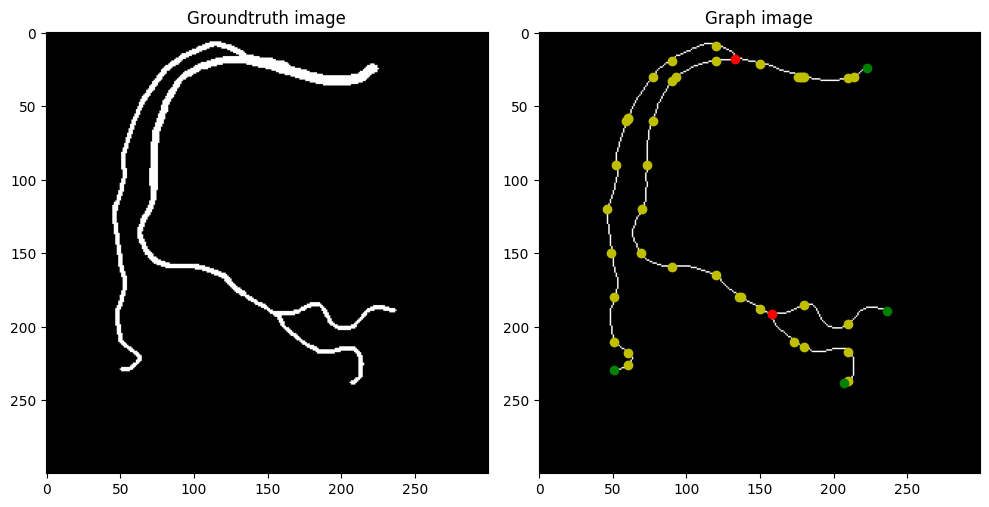

database/7_gt.pgm
176


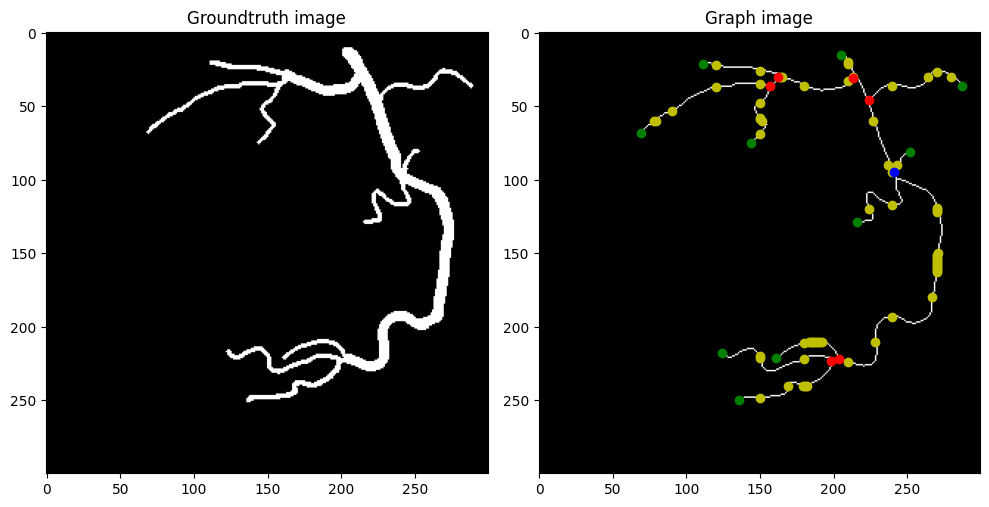

database/8_gt.pgm
148


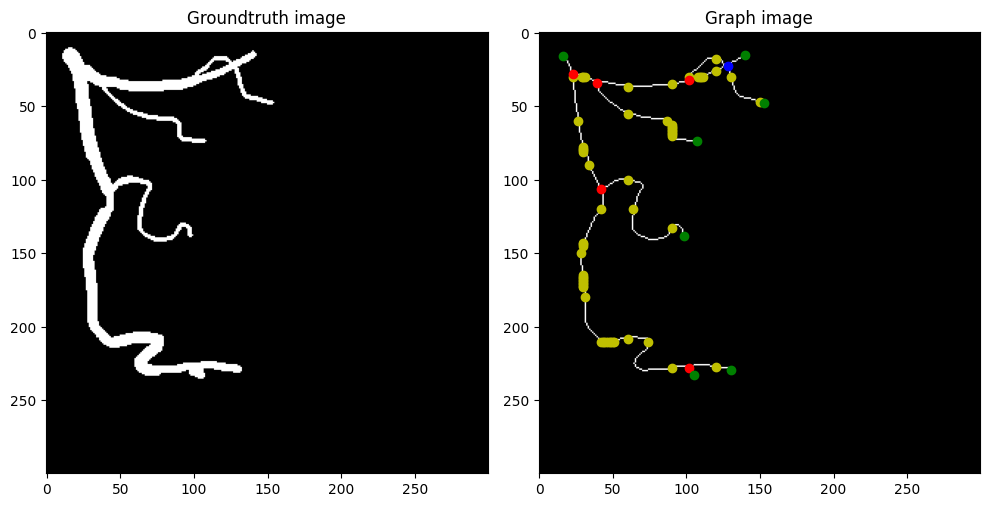

database/9_gt.pgm
142


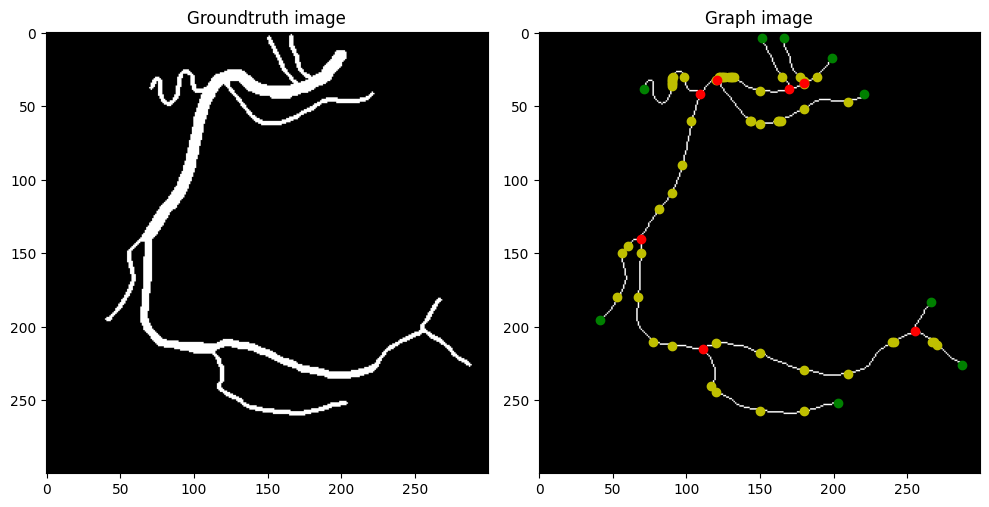

In [651]:
import os
import re

# Ruta de la carpeta
ruta_carpeta = 'database'

# Listar solo los archivos en la carpeta
archivos_en_carpeta = [archivo for archivo in os.listdir(ruta_carpeta) if os.path.isfile(os.path.join(ruta_carpeta, archivo))]

# Aplicar filtro con regex para incluir solo los archivos que contienen "_gt"
archivos_filtrados = [archivo for archivo in archivos_en_carpeta if re.search(r'_gt', archivo)]

# Mostrar los nombres de los archivos filtrados
archivos_filtrados.sort()

Generate_data('database/11_gt.pgm')

for archivo in archivos_filtrados:
    ruta = ruta_carpeta + '/' + archivo
    Generate_data(ruta)
